In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import cv2
import random
import matplotlib

import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from datetime import date
from tqdm import tqdm_notebook as tqdm
from ipywidgets import interact, interactive

In [3]:
data_path = "../../dataset"

In [4]:
os.listdir(f"{data_path}/train")

['images', 'masks', 'boundaries', 'labels']

In [5]:
os.listdir(f"{data_path}/val")

['images', 'masks', 'boundaries', 'labels']

In [6]:
os.listdir(f"{data_path}/test")

['images', 'masks', 'boundaries']

In [7]:
classes = os.listdir(f"{data_path}/train/labels")

# Create train/val dataframes(based on data from organizators)

In [22]:
train_labels = f"{data_path}/train/labels/"
val_labels = f"{data_path}/val/labels/"

train_masks = f"{data_path}/train/masks/"
val_masks = f"{data_path}/val/masks/"

train_boundaries = f"{data_path}/train/boundaries/"
val_boundaries = f"{data_path}/val/boundaries/"


def get_total_pixels_from_mask(mask_path):
    return cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2GRAY).sum() / 255


def get_file_ids(dir_path):
    return [file.split('.')[0] for file in os.listdir(dir_path)]
    

def create_df(labels_path, masks_path, boundaries_path, classes, ds_part):
    cols = os.listdir(f"{data_path}/train/labels")
    cols.extend(["mask", "boundary", "combined_mask", "id", "name", "field_id", "ds_part", "start_x", "start_y", "end_x", "end_y"])
    df = pd.DataFrame(columns=cols)
    file_ids = get_file_ids(os.path.join(labels_path, classes[0]))
    for file_id in tqdm(file_ids):
        df_row = {}
        for class_name in classes:
            df_row["id"] = file_id
            df_row["name"] = f"{file_id}.jpg"
            df_row["field_id"] = file_id.split('_')[0]
            df_row["ds_part"] = ds_part
            coords = file_id.split('_')[1].split('-')
            df_row["start_x"], df_row["start_y"], df_row["end_x"], df_row["end_y"] = \
                coords[0], coords[1], coords[2], coords[3]
            
            label_path = os.path.join(labels_path, class_name, f"{file_id}.png")
            df_row[class_name] = cv2.cvtColor(cv2.imread(label_path), cv2.COLOR_BGR2GRAY).sum() / 255
            
        mask_path = os.path.join(masks_path, f"{file_id}.png")
        if os.path.exists(mask_path):
            mask = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2GRAY).astype(bool)
            df_row["mask"] = mask.sum()
        else:
            df_row["mask"] = 0

        boundary_path = os.path.join(boundaries_path, f"{file_id}.png")
        if os.path.exists(boundary_path):
            boundary = cv2.cvtColor(cv2.imread(boundary_path), cv2.COLOR_BGR2GRAY).astype(bool)
            df_row["boundary"] = boundary.sum()
        else:
            df_row["boundary"] = 0
        if df_row["boundary"] != 0 and df_row["mask"] != 0:
            df_row["combined_mask"] = np.logical_and(boundary, mask).sum()
        else:
            df_row["combined_mask"] = 0
        df = df.append(df_row, ignore_index=True)
    return df

In [ ]:
# train_df = create_df(train_labels, train_masks, train_boundaries, classes, "train")
# val_df = create_df(val_labels, val_masks, val_boundaries, classes, "val")

In [12]:
full_df = pd.read_csv("train_val_initial_2020-03-25.csv")
train_df = full_df[full_df["ds_part"] == 'train']
val_df = full_df[full_df["ds_part"] == 'val']

In [13]:
train_df.head()

,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
0,0.0,0.0,0.0,174211.0,0.0,0.0,0,262144,0,WJZJEE14I_2314-4165-2826-4677,WJZJEE14I_2314-4165-2826-4677.jpg,WJZJEE14I,train,2314,4165,2826,4677
1,0.0,0.0,0.0,35362.0,0.0,0.0,0,226182,0,XD6GQK3HF_1013-830-1525-1342,XD6GQK3HF_1013-830-1525-1342.jpg,XD6GQK3HF,train,1013,830,1525,1342
2,0.0,0.0,0.0,2524.0,0.0,0.0,0,166559,0,91MB8NI61_1538-3232-2050-3744,91MB8NI61_1538-3232-2050-3744.jpg,91MB8NI61,train,1538,3232,2050,3744
3,0.0,0.0,38693.0,0.0,0.0,0.0,0,262144,0,VLABVAH3T_8392-7406-8904-7918,VLABVAH3T_8392-7406-8904-7918.jpg,VLABVAH3T,train,8392,7406,8904,7918
4,0.0,205743.0,0.0,0.0,0.0,0.0,0,223071,0,393VYUQ83_2365-3624-2877-4136,393VYUQ83_2365-3624-2877-4136.jpg,393VYUQ83,train,2365,3624,2877,4136


In [14]:
val_df.head()

,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
12901,25552.0,0.0,0.0,0.0,0.0,0.0,262144,262144,262144,TGFNUCD3N_882-3722-1394-4234,TGFNUCD3N_882-3722-1394-4234.jpg,TGFNUCD3N,val,882,3722,1394,4234
12902,0.0,0.0,0.0,145518.0,0.0,0.0,262144,262144,262144,7E6VFGT98_2239-6942-2751-7454,7E6VFGT98_2239-6942-2751-7454.jpg,7E6VFGT98,val,2239,6942,2751,7454
12903,0.0,0.0,0.0,131754.0,0.0,0.0,262144,262144,262144,Y3RA9WAPY_4569-14153-5081-14665,Y3RA9WAPY_4569-14153-5081-14665.jpg,Y3RA9WAPY,val,4569,14153,5081,14665
12904,0.0,0.0,0.0,12932.0,0.0,0.0,262144,215255,215255,RNXV646CT_1250-614-1762-1126,RNXV646CT_1250-614-1762-1126.jpg,RNXV646CT,val,1250,614,1762,1126
12905,0.0,0.0,0.0,7947.0,0.0,0.0,262144,136309,136309,1J7JL2PDK_2086-2862-2598-3374,1J7JL2PDK_2086-2862-2598-3374.jpg,1J7JL2PDK,val,2086,2862,2598,3374


# Analysis of dataset splits

In [15]:
plt.rcParams.update({'font.size': 22})

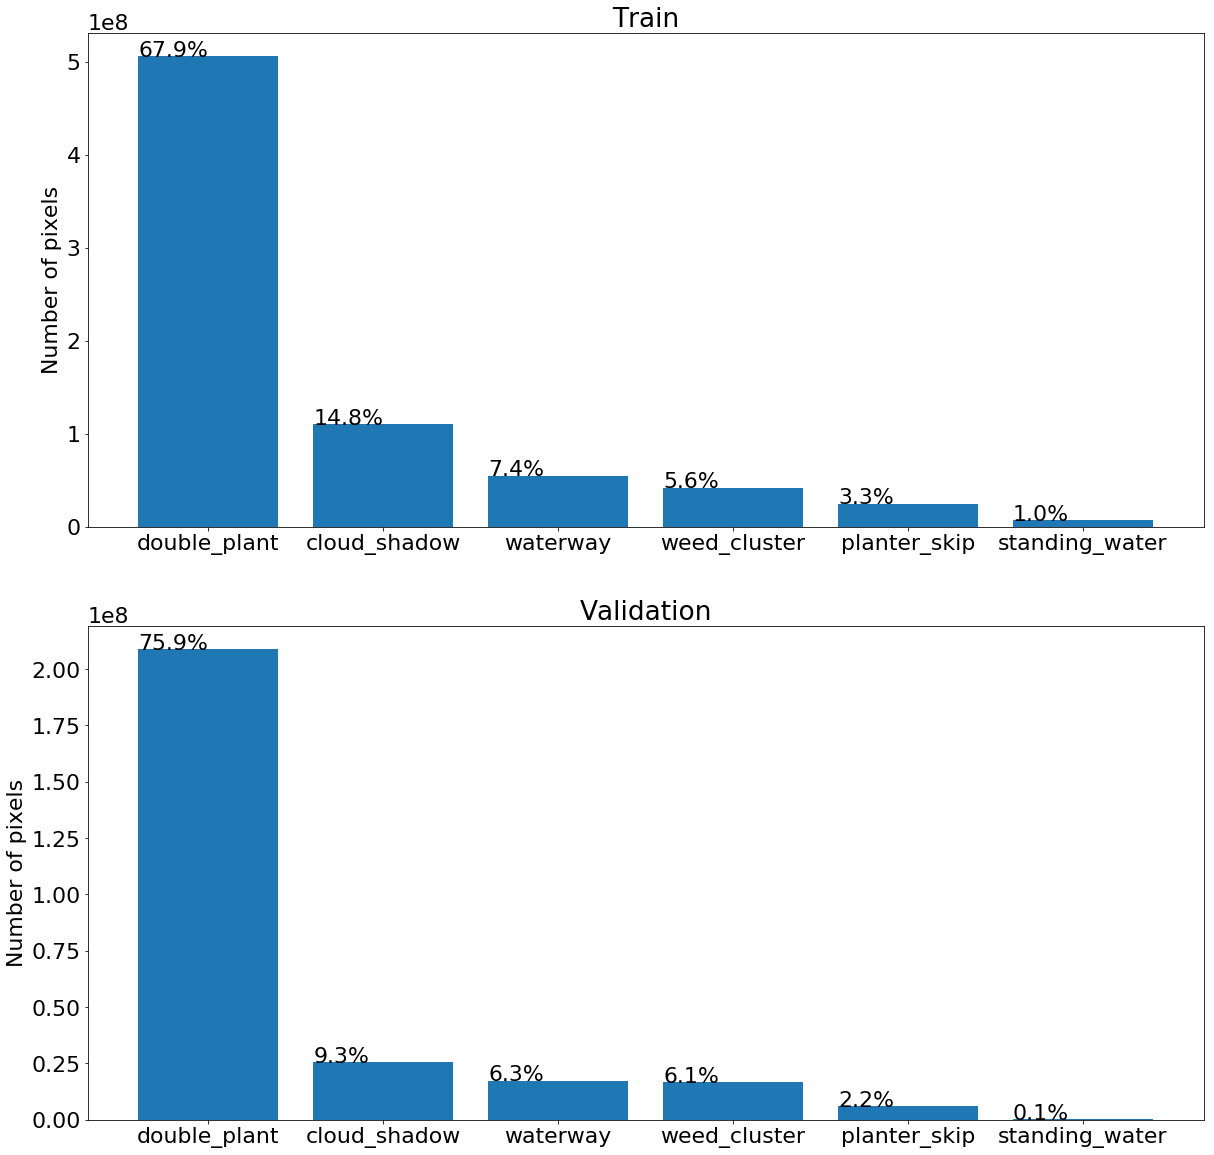

In [16]:
def show_class_distribution(axis, data, classes, y_label, annotations, title):
    x = np.arange(len(classes))
    axis.bar(x, data)
    axis.set_xticks(x)
    axis.set_title(title)
    axis.set_xticklabels([class_name for class_name in classes])
    axis.set_ylabel(y_label)
    
    for p, ann in zip(axis.patches, annotations):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axis.annotate('{:.1%}'.format(ann), (x, y + height + 0.01))

f, axes = plt.subplots(2, 1, figsize=(20, 20))

train_data = train_df[classes].sum().sort_values(ascending=False).values
train_annotations = train_data / train_data.sum()
val_data = val_df[classes].sum().sort_values(ascending=False).values
val_annotations = val_data / val_data.sum()

show_class_distribution(axes[0], train_data, classes, "Number of pixels", train_annotations, "Train")
show_class_distribution(axes[1], val_data, classes, "Number of pixels", val_annotations, "Validation")

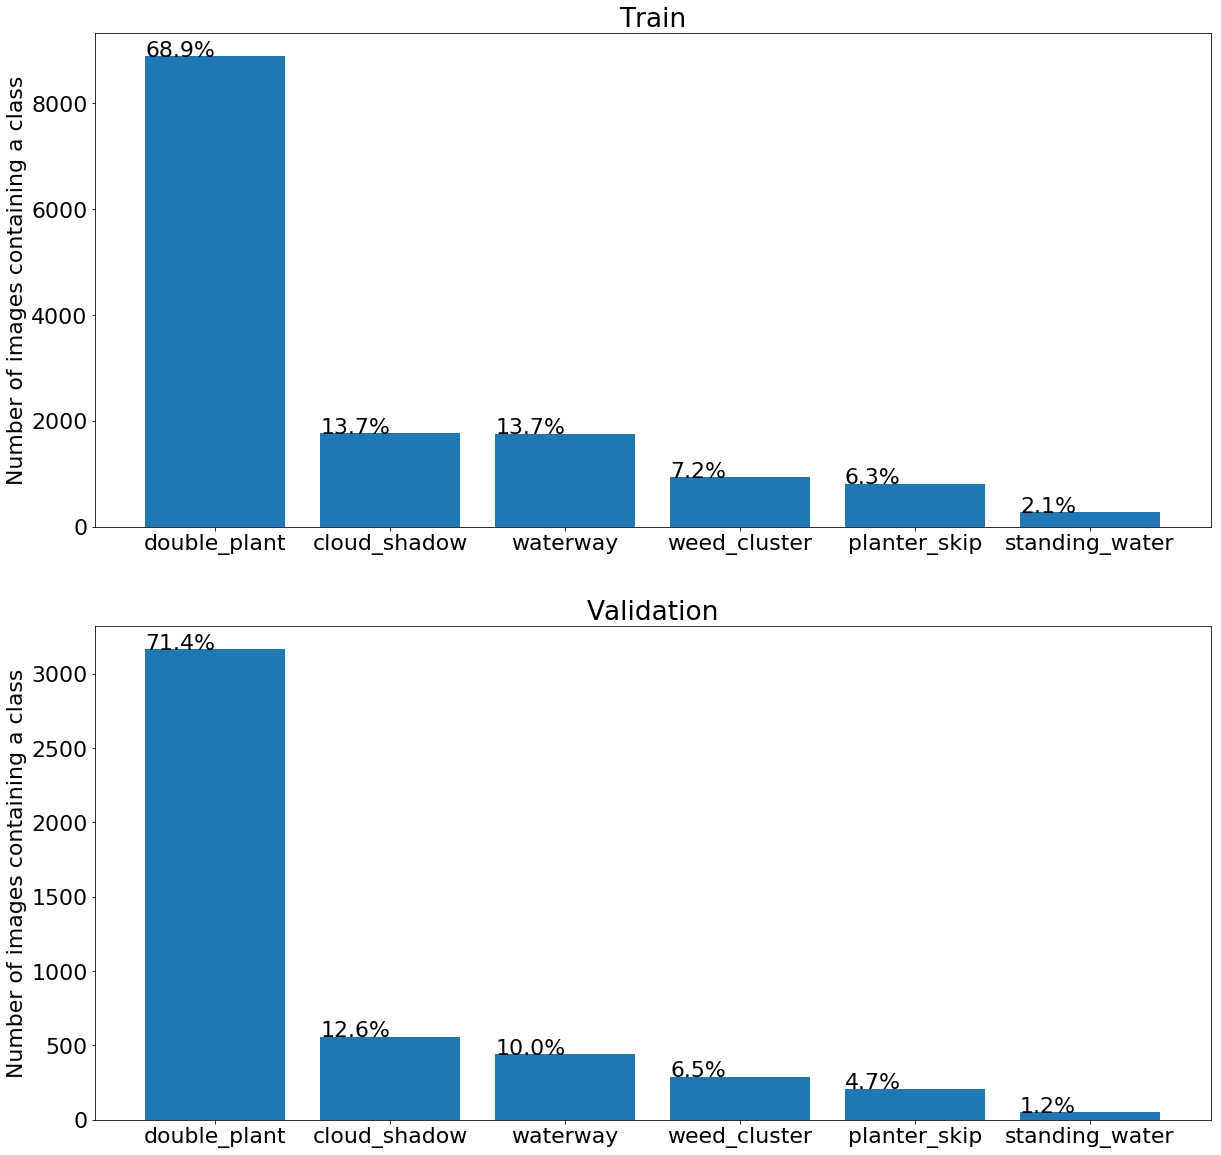

In [17]:
f, axes = plt.subplots(2, 1, figsize=(20, 20))

train_data = train_df[classes].astype(bool).sum().sort_values(ascending=False).values
train_annotations = train_data / len(train_df)

val_data = val_df[classes].astype(bool).sum().sort_values(ascending=False).values
val_annotations = val_data / len(val_df)

show_class_distribution(axes[0], train_data, classes, "Number of images containing a class", train_annotations, "Train")
show_class_distribution(axes[1], val_data, classes, "Number of images containing a class", val_annotations, "Validation")

# Analysis of masks and boundaries

In [18]:
fully_valid_data = full_df[full_df["mask"] == 512*512]
print(len(fully_valid_data))
fully_valid_data.head()

10847


,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
6001,0.0,0.0,0.0,26906.0,0.0,0.0,262144,159996,159996,Z3DMHMQB8_2982-2693-3494-3205,Z3DMHMQB8_2982-2693-3494-3205.jpg,Z3DMHMQB8,train,2982,2693,3494,3205
6002,0.0,0.0,1893.0,82070.0,0.0,0.0,262144,255720,255720,HGGRCHZKT_1353-1872-1865-2384,HGGRCHZKT_1353-1872-1865-2384.jpg,HGGRCHZKT,train,1353,1872,1865,2384
6003,0.0,0.0,0.0,81377.0,0.0,0.0,262144,262144,262144,Z3DMHMQB8_2485-2560-2997-3072,Z3DMHMQB8_2485-2560-2997-3072.jpg,Z3DMHMQB8,train,2485,2560,2997,3072
6004,0.0,0.0,0.0,14887.0,0.0,0.0,262144,166401,166401,D4NRBCDFQ_4170-1285-4682-1797,D4NRBCDFQ_4170-1285-4682-1797.jpg,D4NRBCDFQ,train,4170,1285,4682,1797
6006,0.0,71497.0,0.0,0.0,0.0,0.0,262144,262144,262144,393VYUQ83_3029-1604-3541-2116,393VYUQ83_3029-1604-3541-2116.jpg,393VYUQ83,train,3029,1604,3541,2116


In [19]:
no_mask_data = full_df[full_df["mask"] == 0]
print(len(no_mask_data))
no_mask_data.head()

6343


,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
0,0.0,0.0,0.0,174211.0,0.0,0.0,0,262144,0,WJZJEE14I_2314-4165-2826-4677,WJZJEE14I_2314-4165-2826-4677.jpg,WJZJEE14I,train,2314,4165,2826,4677
1,0.0,0.0,0.0,35362.0,0.0,0.0,0,226182,0,XD6GQK3HF_1013-830-1525-1342,XD6GQK3HF_1013-830-1525-1342.jpg,XD6GQK3HF,train,1013,830,1525,1342
2,0.0,0.0,0.0,2524.0,0.0,0.0,0,166559,0,91MB8NI61_1538-3232-2050-3744,91MB8NI61_1538-3232-2050-3744.jpg,91MB8NI61,train,1538,3232,2050,3744
3,0.0,0.0,38693.0,0.0,0.0,0.0,0,262144,0,VLABVAH3T_8392-7406-8904-7918,VLABVAH3T_8392-7406-8904-7918.jpg,VLABVAH3T,train,8392,7406,8904,7918
4,0.0,205743.0,0.0,0.0,0.0,0.0,0,223071,0,393VYUQ83_2365-3624-2877-4136,393VYUQ83_2365-3624-2877-4136.jpg,393VYUQ83,train,2365,3624,2877,4136


In [20]:
partly_invalid_data = full_df[(full_df["mask"] != 0) & (full_df["mask"] != 512*512)]
print(len(partly_invalid_data))
partly_invalid_data.head()

142


,double_plant,cloud_shadow,waterway,weed_cluster,planter_skip,standing_water,mask,boundary,combined_mask,id,name,field_id,ds_part,start_x,start_y,end_x,end_y
6010,0.0,0.0,0.0,76109.0,0.0,0.0,258921,262144,258921,8LK6KEGMI_2671-4581-3183-5093,8LK6KEGMI_2671-4581-3183-5093.jpg,8LK6KEGMI,train,2671,4581,3183,5093
6066,0.0,0.0,0.0,128031.0,0.0,0.0,262139,194863,194863,NYIXWWPDF_5226-2360-5738-2872,NYIXWWPDF_5226-2360-5738-2872.jpg,NYIXWWPDF,train,5226,2360,5738,2872
6093,0.0,0.0,0.0,107113.0,0.0,0.0,232776,188030,185951,YNMRGGVQ3_5243-1876-5755-2388,YNMRGGVQ3_5243-1876-5755-2388.jpg,YNMRGGVQ3,train,5243,1876,5755,2388
6105,0.0,0.0,0.0,10630.0,0.0,0.0,262100,198319,198275,AMHWXGPTC_739-3202-1251-3714,AMHWXGPTC_739-3202-1251-3714.jpg,AMHWXGPTC,train,739,3202,1251,3714
6268,0.0,0.0,0.0,146201.0,0.0,0.0,261951,262144,261951,NYIXWWPDF_4736-4460-5248-4972,NYIXWWPDF_4736-4460-5248-4972.jpg,NYIXWWPDF,train,4736,4460,5248,4972


# Visualizing data with fully valid masks

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(10, 2, figsize = (20, 100))
for idx, row in fully_valid_data.reset_index().iterrows():
    if idx == 10:
        break
    image = cv2.cvtColor(cv2.imread(f"{data_path}/{row.ds_part}/images/rgb/{row['id']}.jpg"), cv2.COLOR_BGR2RGB)
    colors = [np.array([255,0,0]), 
              np.array([0,255,0]), 
              np.array([0,0,255]), 
              np.array([255,255,0]), 
              np.array([255,0,255]), 
              np.array([0,255,255])]
    label_stack = np.zeros(image.shape)
    for label_idx, label in enumerate(os.listdir(train_labels)):
        label_mask = cv2.imread(f"{data_path}/{row['ds_part']}/labels/{label}/{row['id']}.png")
        label_stack += label_mask / 255 * colors[label_idx]
    axes[idx, 0].set_title(row.id)
    axes[idx, 0].imshow(image)
    patches = [mpatches.Patch(color=np.append(colors[i] / 255, 1), label=classes[i]) for i in range(len(classes))]
    axes[idx, 1].set_title("Labels")
    axes[idx, 1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes[idx, 1].imshow(label_stack.astype(np.uint8))

# Visualizing data with no masks

In [ ]:
len(full_df[(full_df["mask"] == 0) & (full_df["ds_part"] == 'train')])

In [ ]:
len(full_df[(full_df["mask"] == 0) & (full_df["ds_part"] == 'val')])

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(10, 2, figsize = (20, 100))
for idx, row in no_mask_data.reset_index().iterrows():
    if idx == 10:
        break
    image = cv2.cvtColor(cv2.imread(f"{data_path}/{row.ds_part}/images/rgb/{row['id']}.jpg"), cv2.COLOR_BGR2RGB)
    colors = [np.array([255,0,0]), 
              np.array([0,255,0]), 
              np.array([0,0,255]), 
              np.array([255,255,0]), 
              np.array([255,0,255]), 
              np.array([0,255,255])]
    label_stack = np.zeros(image.shape)
    for label_idx, label in enumerate(os.listdir(train_labels)):
        label_mask = cv2.imread(f"{data_path}/{row['ds_part']}/labels/{label}/{row['id']}.png")
        label_stack += label_mask / 255 * colors[label_idx]
    axes[idx, 0].set_title(row.id)
    axes[idx, 0].imshow(image)
    patches = [mpatches.Patch(color=np.append(colors[i] / 255, 1), label=classes[i]) for i in range(len(classes))]
    axes[idx, 1].set_title("Labels")
    axes[idx, 1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes[idx, 1].imshow(label_stack.astype(np.uint8))

# Visualizing partly invalid data

In [ ]:
len(partly_invalid_data[partly_invalid_data["ds_part"] == 'train'])

In [ ]:
len(partly_invalid_data[partly_invalid_data["ds_part"] == 'val'])

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(10, 2, figsize = (20, 100))
for idx, row in partly_invalid_data.reset_index().iterrows():
    if idx == 10:
        break
    image = cv2.cvtColor(cv2.imread(f"{data_path}/train/images/rgb/{row['id']}.jpg"), cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(cv2.imread(f"{data_path}/train/masks/{row['id']}.png"), cv2.COLOR_BGR2GRAY)
    axes[idx, 0].set_title(row.id)
    axes[idx, 0].imshow(image)
    axes[idx, 1].set_title(row.id)
    axes[idx, 1].imshow(mask, 'gray')

# Interactive view of data

In [ ]:
random.seed(41)
plt.rcParams.update({'font.size': 22})

def f(x):   
    images_path = f"{data_path}/{dataset}/images"
    masks_path = f"{data_path}/{dataset}/masks"
    boundaries_path = f"{data_path}/{dataset}/boundaries"
    labels_path = f"{data_path}/{dataset}/labels"
    image_id = df_for_visualization.id.iloc[x]
    print(image_id)
        
    fig, axes = plt.subplots(2, 3, figsize = (30, 20))
    
    rgb_image = cv2.imread(f"{images_path}/rgb/{image_id}.jpg")
    axes[0, 0].set_title('RGB')
    axes[0, 0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))

    nir_image = cv2.imread(f"{images_path}/nir/{image_id}.jpg")
    axes[0, 1].set_title('NIR')
    axes[0, 1].imshow(cv2.cvtColor(nir_image, cv2.COLOR_BGR2RGB))
    
    boundary = cv2.cvtColor(cv2.imread(f"{boundaries_path}/{image_id}.png"), cv2.COLOR_BGR2GRAY)
    if os.path.exists(f"{masks_path}/{image_id}.png"):
        print('HAS MASK')
        mask = cv2.cvtColor(cv2.imread(f"{masks_path}/{image_id}.png"), cv2.COLOR_BGR2GRAY)
    else:
        print('NO MASK')
        mask = np.zeros((rgb_image.shape[0], rgb_image.shape[1]))
    combined_mask = np.logical_and(mask.astype(bool), boundary.astype(bool))
    axes[1, 0].set_title('Mask')
    axes[1, 0].imshow(mask, cmap='gray', vmin=0, vmax=255)
    axes[1, 1].set_title('Boundary')
    axes[1, 1].imshow(boundary, cmap='gray', vmin=0, vmax=255)
    axes[1, 2].set_title('Combined mask')
    axes[1, 2].imshow(combined_mask * 255, cmap='gray', vmin=0, vmax=255)

    colors = [np.array([255,0,0]), 
              np.array([0,255,0]), 
              np.array([0,0,255]), 
              np.array([255,255,0]), 
              np.array([255,0,255]), 
              np.array([0,255,255])]
#     colors = [np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]) 
#       for _ in range(len(classes))]
    label_stack = np.zeros(rgb_image.shape)
    for idx, label in enumerate(os.listdir(labels_path)):
        label_mask = cv2.imread(f"{labels_path}/{label}/{image_id}.png")
        label_stack += label_mask / 255 * colors[idx]
    axes[0, 2].set_title("Labels")
    patches = [ mpatches.Patch(color=np.append(colors[i] / 255, 1), label=classes[i]) for i in range(len(classes)) ]
    axes[0, 2].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    axes[0, 2].imshow(label_stack.astype(np.uint8))

dataset = 'train'
df_for_visualization = full_df[full_df['ds_part'] == dataset]

interact(f, x=widgets.IntSlider(min=0, 
                                max=len(df_for_visualization.id) - 1, 
                                step=1, 
                                value=0, 
                                continuous_update=False));

In [ ]:
full_df.field_id.value_counts().hist()